In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_indonesia = df[df['job_country'] == 'Indonesia'].copy()
df_indonesia['job_posted_month'] = df_indonesia['job_posted_date'].dt.strftime('%B') 
df_indo_pivot = df_indonesia.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_indo_pivot.reset_index(inplace=True)
df_indo_pivot['month_no'] = pd.to_datetime(df_indo_pivot['job_posted_month'], format='%B').dt.month
df_indo_pivot.sort_values('month_no', inplace=True)
df_indo_pivot.set_index('job_posted_month',inplace=True)
df_indo_pivot.drop(columns='month_no', inplace=True)

df_indo_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,14,9,35,117,80,8,5,10,19,14
February,9,2,25,78,44,5,4,12,5,18
March,6,5,21,90,36,2,1,13,5,14
April,5,3,20,46,28,2,1,9,8,14
May,11,9,25,79,39,3,2,8,9,4
June,11,4,22,66,32,4,1,8,9,8
July,11,3,25,58,46,9,4,8,3,20
August,12,5,32,78,46,1,3,5,5,15
September,4,7,34,83,50,6,5,10,8,9


In [9]:
df_software_indo = pd.read_csv('C:/Users/bagus/Downloads/software_jobs.csv', delimiter=';', index_col='job_posted_month')

In [11]:
df_merged = df_indo_pivot.merge(df_software_indo, on='job_posted_month')

In [24]:
top_5 = df_merged.sum().sort_values(ascending=False).head(5).index.tolist()
top_5

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'UI/UX Designer',
 'Front-End Developer']

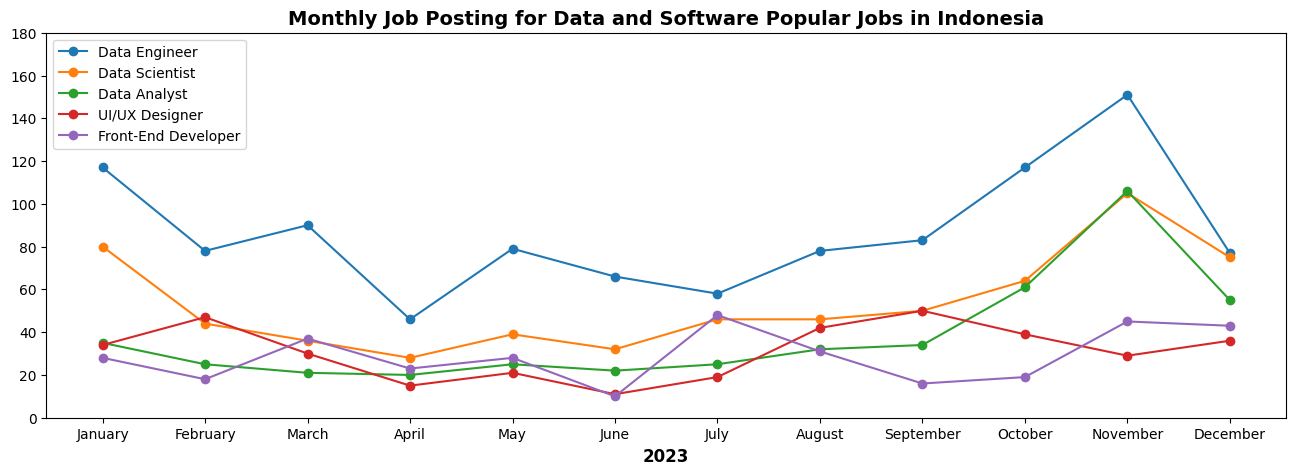

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 5))

df_merged[top_5].plot(kind='line', ax=ax, marker='o')

ax.set_xticks(range(len(df_merged.index)))  # Indeks numerik 0–11
ax.set_xticklabels(df_merged.index, rotation=0)

plt.title('Monthly Job Posting for Data and Software Popular Jobs in Indonesia', fontsize=14, fontweight='bold')
plt.xlabel('2023', fontsize=12, fontweight='bold')
plt.ylim(0, 180)
plt.show()